# 01 Preprocess data

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import skimage.io

from smh_eyetracking.game import config as config_game
from smh_eyetracking.features02 import config as config_features02
from smh_eyetracking.features02.utils.features02_dlib import FEATURES, TARGETS
from smh_eyetracking.features02.utils.normalize import normalize_features02

%matplotlib inline

## Load dataset

In [2]:
# How to process the string features
# Dict 'feature_ name': 'typecasting function'

feat_types = {f:np.int32 for f in FEATURES}
feat_types.update({
    'eye_right_image':  np.str,
    'eye_left_image':  np.str,
    # Shot
    'y': np.int32,
    'x': np.int32,
    'score': np.int32,
    'timestamp':  np.int32,
    'img_path':  np.str,
    'img': np.str,  # Relative to the raw dataset

    # Game
    'game_id': np.str,
    'glasses': np.bool,
    'screen_diagonal': np.float,
    'camera_position': np.str,
    'screen_height': np.int32,
    'screen_width': np.int32,
})

In [3]:
# Load the dataset
data = pd.read_csv(
    config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_CSV,
    usecols=feat_types
)

## Scale

* x axis: [-1, 1]
* y axis: [-1, 1]

In [4]:
normalize_features02(data, FEATURES, config_game.WEBCAM_WIDTH, config_game.WEBCAM_HEIGHT)
normalize_features02(data,TARGETS, config_game.SCREEN_WIDTH, config_game.SCREEN_HEIGHT)

## Drop unneeded columns

In [5]:
data.drop(
    labels= [
        'timestamp', 'img_path', 'game_id', 'screen_diagonal',
        'camera_position', 'screen_height', 'screen_width', 'score'
    ],  # img field will be used to discriminate train/val/test
    axis=1,
    inplace=True
)

## Clean data

In [6]:
data.describe().loc[['min','max']]

,11.x,2.x,45.x,0.x,11.y,1.y,7.y,28.y,0.y,15.y,...,33.x,face.y,15.x,2.y,39.x,41.x,37.x,12.x,14.x,10.y
min,-0.832812,-1.025000,-0.815625,-1.009375,-0.561111,-0.838889,-0.455556,-0.861111,-0.902778,-0.838889,...,-0.915625,-1.116667,-0.767188,-0.772222,-0.928125,-0.965625,-0.960938,-0.807813,-0.778125,-0.488889
max,1.007812,0.753125,0.984375,0.728125,0.952778,0.488889,1.075000,0.477778,0.372222,0.458333,...,0.932813,0.175000,1.028125,0.600000,0.864062,0.828125,0.826563,1.021875,1.029688,1.033333


Everything makes sense.

## Target stats

/home/ubuntu/hci-eye_tracking-workshop/venv3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


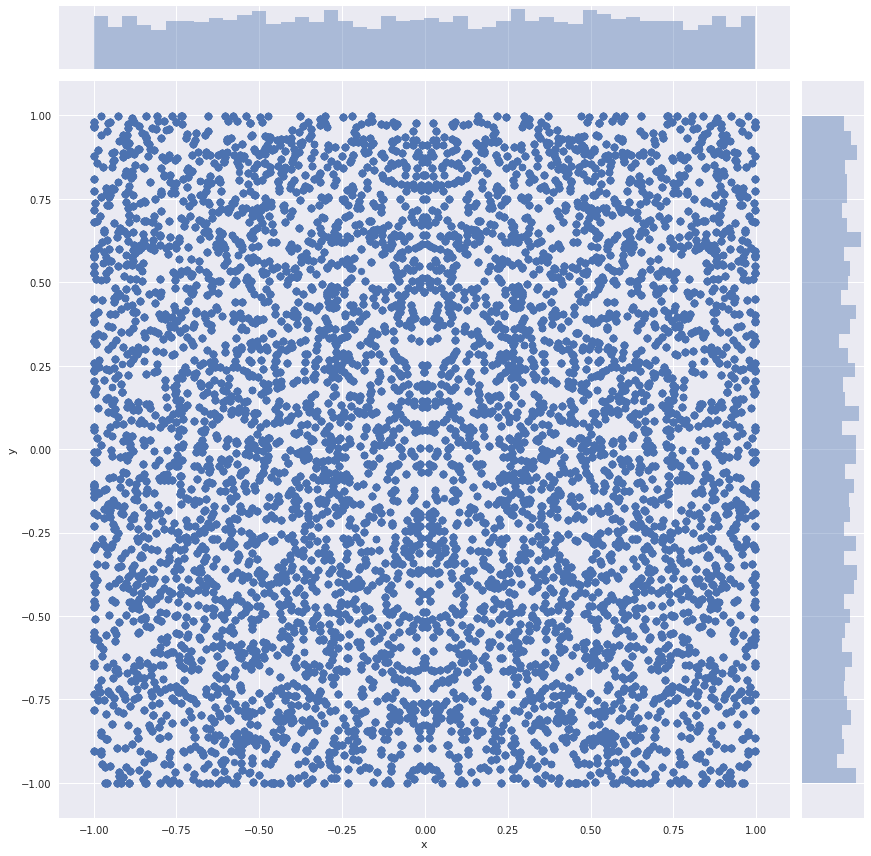

In [7]:
sns.jointplot(x="x", y="y", data=data, kind="scatter", stat_func=None, size=12, ratio=10)

/home/ubuntu/hci-eye_tracking-workshop/venv3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


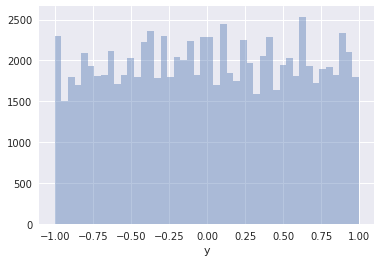

In [8]:
sns.distplot(data['y'], hist=True, norm_hist=False, kde=False)

/home/ubuntu/hci-eye_tracking-workshop/venv3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


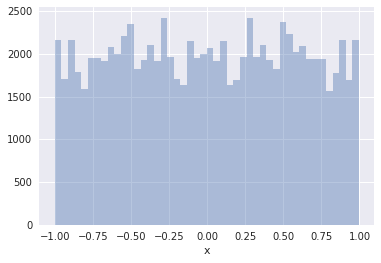

In [9]:
sns.distplot(data['x'], hist=True, norm_hist=False, kde=False)

## Eye images structure

In [10]:
imgs_left = []
imgs_right = []
errors = []

for i, row in data.iterrows():
    try:
        # Scale pixel value in range [-1,1]
        imgs_left.append((skimage.io.imread(config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED+row['eye_left_image'])/255-0.5)*2)
    except Exception as e:
        errors.append(path)
    try:
        # Scale pixel value in range [-1,1]
        imgs_right.append((skimage.io.imread(config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED+row['eye_right_image'])/255-0.5)*2)
    except Exception as e:
        errors.append(path)

## Save things

In [11]:
if not os.path.exists(config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM):
    os.makedirs(config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM)

# CSV
data.to_csv(config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_CSV, index=False)
# Images
np.save(file=config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_IMGS_LEFT, arr=imgs_left)
np.save(file=config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_IMGS_RIGHT, arr=imgs_right)